In [15]:
import numpy as np
import pandas as pd
import os

import cv2
from PIL import Image

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


In [6]:
images = []
labels = []

train_path = "./archive/train_zip/train/"

for filename in os.listdir(train_path):
    if filename.split('.')[1] == "jpg":
        img = cv2.imread(os.path.join(train_path, filename))
        arr = Image.fromarray(img, "RGB")
        r = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(r))



In [11]:
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [14]:
la = LabelEncoder()
labels = pd.DataFrame(labels)
labels = la.fit_transform(labels[0])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

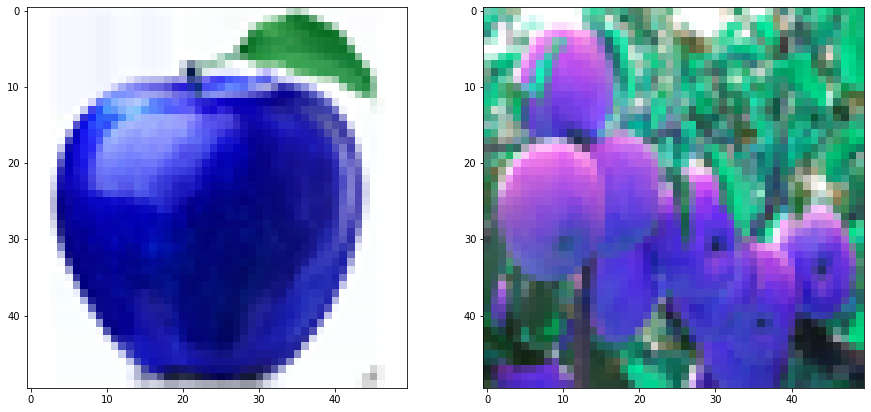

In [18]:
figure = plt.figure(figsize=(15,10))

ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [22]:
images = np.array(images)
np.save("image", images)
np.save("labels", labels)


In [24]:
image = np.load("image.npy", allow_pickle=True)
labels = np.load("labels.npy", allow_pickle=True)


In [25]:
s=np.arange(image.shape[0])
np.random.shuffle(s)
image=image[s]
labels=labels[s]

In [26]:
num_classes=len(np.unique(labels))
len_data=len(image)

In [27]:
x_train,x_test=image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [29]:
import tensorflow.keras as keras
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [32]:
l2_reg=0.001
opt=Adam(lr=0.001)

/home/vishwa/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [33]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(50,50, 3), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0

In [34]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history=model.fit(x_train,y_train,batch_size=128,epochs=110,verbose=1,validation_split=0.33,callbacks=[checkpoint])

och 14/110
2/2 [==============================] - 0s 103ms/step - loss: 1.0265 - accuracy: 0.6458 - val_loss: 0.8643 - val_accuracy: 0.7222

Epoch 00014: loss improved from 1.11458 to 1.02645, saving model to weights.hdf5
Epoch 15/110
2/2 [==============================] - 0s 103ms/step - loss: 0.8577 - accuracy: 0.6806 - val_loss: 0.8669 - val_accuracy: 0.7639

Epoch 00015: loss improved from 1.02645 to 0.85770, saving model to weights.hdf5
Epoch 16/110
2/2 [==============================] - 0s 104ms/step - loss: 0.8908 - accuracy: 0.7083 - val_loss: 0.9008 - val_accuracy: 0.7917

Epoch 00016: loss did not improve from 0.85770
Epoch 17/110
2/2 [==============================] - 0s 102ms/step - loss: 0.7949 - accuracy: 0.7639 - val_loss: 0.9088 - val_accuracy: 0.7361

Epoch 00017: loss improved from 0.85770 to 0.79490, saving model to weights.hdf5
Epoch 18/110
2/2 [==============================] - 1s 112ms/step - loss: 0.7211 - accuracy: 0.7569 - val_loss: 0.9068 - val_accuracy: 0.750

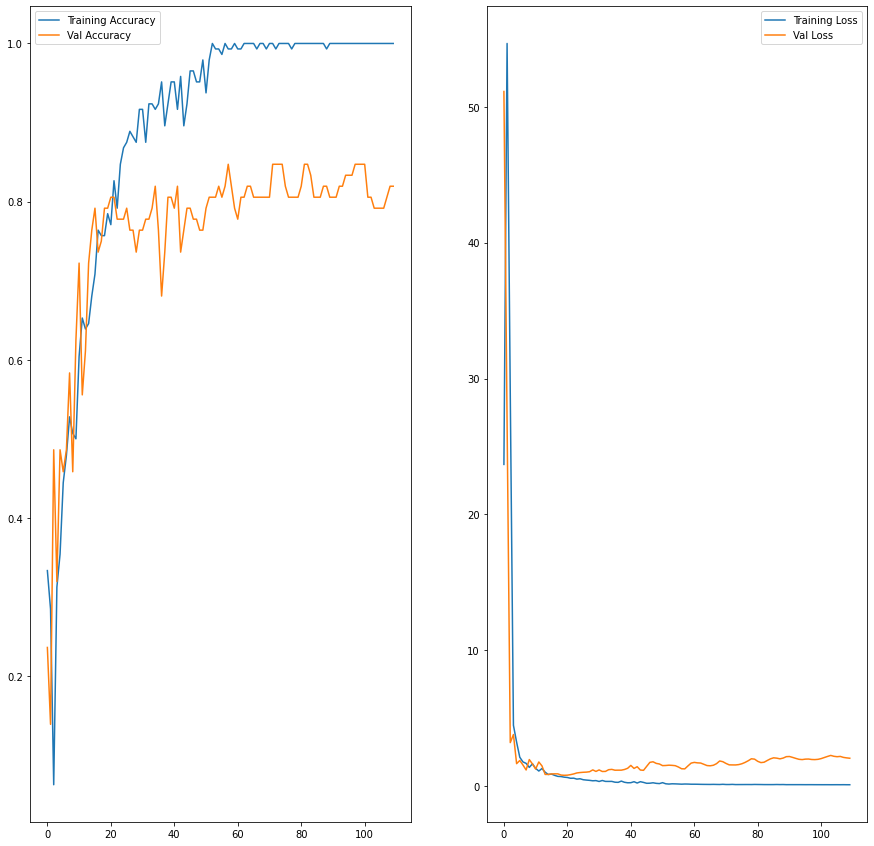

In [35]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

In [36]:
test_path = './archive/test_zip/test/'
t_labels=[]
t_images=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        ary=Image.fromarray(img,'RGB')
        r=ary.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(r))

In [41]:
a = np.unique(t_labels)

In [37]:
t_images=np.array(t_images)
np.save("t_image",t_images)
t_image=np.load("image.npy",allow_pickle=True)

orange


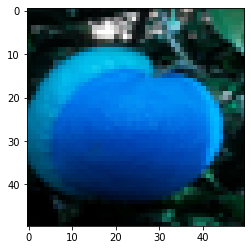

In [45]:
pred=np.argmax(model.predict(t_image),axis=1)
prediction = la.inverse_transform(pred)

t_image=np.expand_dims(t_images[50],axis=0)
pred_t=np.argmax(model.predict(t_image),axis=1)
prediction_t = la.inverse_transform(pred_t)


print(a[prediction_t[0]])
plt.imshow(t_images[50])